**Importing Libraries and Data Set**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score


url = 'https://raw.githubusercontent.com/Harryshield14/DS-3001-Final-Project/main/communities.data'

df = pd.read_csv(url, header = None)
df_copy = df.copy()

#Create a subset of the data with the chosen columns
cols = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 73, 16, 33, 96, 122, 127, 118, 119, 108, 105, 94]
df_subset = df_copy.iloc[:, cols]
df_subset.columns = [
   "state",
    "county",
    "community",
    "communityname",
    "population",
    "householdsize",
    "racepctblack",
    "racePctWhite",
    "racePctAsian",
    "racePctHisp",
    "agePct12t21",
    "agePct12t29",
    "agePct16t24",
    "agePct65up",
    "PctPersDenseHous",
    "medIncome",
    "PctPopUnderPov",
    "PctForeignBorn",
    "PolicperBudg",
    "ViolentCrimesPerPop",
    "LandArea",
    "PopDens",
    "PolicPerPop",
    "LemasTotalReq",
    "NumInShelters"
]
#View dataset
df_subset.head()

state county community        communityname  population  householdsize  \
0      8      ?         ?         Lakewoodcity        0.19           0.33   
1     53      ?         ?          Tukwilacity        0.00           0.16   
2     24      ?         ?         Aberdeentown        0.00           0.42   
3     34      5     81440  Willingborotownship        0.04           0.77   
4     42     95      6096    Bethlehemtownship        0.01           0.55   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  ...  medIncome  \
0          0.02          0.90          0.12         0.17  ...        1.0   
1          0.12          0.74          0.45         0.07  ...        1.0   
2          0.49          0.56          0.17         0.04  ...        0.0   
3          1.00          0.08          0.12         0.10  ...        1.0   
4          0.02          0.95          0.09         0.05  ...        0.9   

   PctPopUnderPov  PctForeignBorn  PolicperBudg  ViolentCrimesPerPop  \
0            0.19            0.12          0.04                 0.20   
1            0.24            0.21             ?                 0.67   
2            0.27            0.14             ?                 0.43   
3            0.10            0.19             ?                 0.12   
4            0.06            0.11             ?                 0.03   

   LandArea  PopDens  PolicPerPop LemasTotalReq  NumInShelters  
0      0.12     0.26         0.13          0.06           0.04  
1      0.02     0.12            ?             ?           0.00  
2      0.01     0.21            ?             ?           0.00  
3      0.02     0.39            ?             ?           0.00  
4      0.04     0.09            ?             ?           0.00  

[5 rows x 25 columns]

**Cleaning Data**

In [2]:
#Handle missing values and replace '?' with a nan value
df_subset_c = df_subset.copy()
df_subset_c.replace('?', np.nan, inplace = True)
df_subset_c.head()


state county community        communityname  population  householdsize  \
0      8    NaN       NaN         Lakewoodcity        0.19           0.33   
1     53    NaN       NaN          Tukwilacity        0.00           0.16   
2     24    NaN       NaN         Aberdeentown        0.00           0.42   
3     34      5     81440  Willingborotownship        0.04           0.77   
4     42     95      6096    Bethlehemtownship        0.01           0.55   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  ...  medIncome  \
0          0.02          0.90          0.12         0.17  ...        1.0   
1          0.12          0.74          0.45         0.07  ...        1.0   
2          0.49          0.56          0.17         0.04  ...        0.0   
3          1.00          0.08          0.12         0.10  ...        1.0   
4          0.02          0.95          0.09         0.05  ...        0.9   

   PctPopUnderPov  PctForeignBorn  PolicperBudg  ViolentCrimesPerPop  \
0            0.19            0.12          0.04                 0.20   
1            0.24            0.21           NaN                 0.67   
2            0.27            0.14           NaN                 0.43   
3            0.10            0.19           NaN                 0.12   
4            0.06            0.11           NaN                 0.03   

   LandArea  PopDens  PolicPerPop LemasTotalReq  NumInShelters  
0      0.12     0.26         0.13          0.06           0.04  
1      0.02     0.12          NaN           NaN           0.00  
2      0.01     0.21          NaN           NaN           0.00  
3      0.02     0.39          NaN           NaN           0.00  
4      0.04     0.09          NaN           NaN           0.00  

[5 rows x 25 columns]

In [3]:
#Check missing values per column
df_subset.isnull().sum()

state                  0
county                 0
community              0
communityname          0
population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
racePctHisp            0
agePct12t21            0
agePct12t29            0
agePct16t24            0
agePct65up             0
PctPersDenseHous       0
medIncome              0
PctPopUnderPov         0
PctForeignBorn         0
PolicperBudg           0
ViolentCrimesPerPop    0
LandArea               0
PopDens                0
PolicPerPop            0
LemasTotalReq          0
NumInShelters          0
dtype: int64

In [4]:
#Check datatypes of columns
df_subset.dtypes

state                    int64
county                  object
community               object
communityname           object
population             float64
householdsize          float64
racepctblack           float64
racePctWhite           float64
racePctAsian           float64
racePctHisp            float64
agePct12t21            float64
agePct12t29            float64
agePct16t24            float64
agePct65up             float64
PctPersDenseHous       float64
medIncome              float64
PctPopUnderPov         float64
PctForeignBorn         float64
PolicperBudg            object
ViolentCrimesPerPop    float64
LandArea               float64
PopDens                float64
PolicPerPop             object
LemasTotalReq           object
NumInShelters          float64
dtype: object

In [10]:
#Convert datatypes


df_subset_c['county'] = df_subset['county'].astype(str)
df_subset_c['community'] = df_subset['community'].astype(str)

df_subset_c['PolicperBudg'] = pd.to_numeric(df_subset['PolicperBudg'], errors='coerce')
df_subset_c['PolicPerPop'] = pd.to_numeric(df_subset['PolicPerPop'], errors='coerce')
df_subset_c['LemasTotalReq'] = pd.to_numeric(df_subset['LemasTotalReq'], errors='coerce')


In [11]:
#Create a dictionary to map the state names (using FIPS code)
state_mapping = {
    "1": "ALABAMA", "2": "ALASKA", "4": "ARIZONA", "5": "ARKANSAS", "6": "CALIFORNIA",
    "8": "COLORADO", "9": "CONNECTICUT", "10": "DELAWARE", "11": "DISTRICT OF COLUMBIA",
    "12": "FLORIDA", "13": "GEORGIA", "15": "HAWAII", "16": "IDAHO", "17": "ILLINOIS",
    "18": "INDIANA", "19": "IOWA", "20": "KANSAS", "21": "KENTUCKY", "22": "LOUISIANA",
    "23": "MAINE", "24": "MARYLAND", "25": "MASSACHUSETTS", "26": "MICHIGAN",
    "27": "MINNESOTA", "28": "MISSISSIPPI", "29": "MISSOURI", "30": "MONTANA",
    "31": "NEBRASKA", "32": "NEVADA", "33": "NEW HAMPSHIRE", "34": "NEW JERSEY",
    "35": "NEW MEXICO", "36": "NEW YORK", "37": "NORTH CAROLINA", "38": "NORTH DAKOTA",
    "39": "OHIO", "40": "OKLAHOMA", "41": "OREGON", "42": "PENNSYLVANIA", "44": "RHODE ISLAND",
    "45": "SOUTH CAROLINA", "46": "SOUTH DAKOTA", "47": "TENNESSEE", "48": "TEXAS",
    "49": "UTAH", "50": "VERMONT", "51": "VIRGINIA", "53": "WASHINGTON",
    "54": "WEST VIRGINIA", "55": "WISCONSIN", "56": "WYOMING"
}

df_subset_c['state'] = df_subset_c['state'].astype(str)

df_subset_c['state'] = df_subset_c['state'].map(state_mapping)


In [12]:
df_subset_c.head()

state county community        communityname  population  householdsize  \
0   NaN      ?         ?         Lakewoodcity        0.19           0.33   
1   NaN      ?         ?          Tukwilacity        0.00           0.16   
2   NaN      ?         ?         Aberdeentown        0.00           0.42   
3   NaN      5     81440  Willingborotownship        0.04           0.77   
4   NaN     95      6096    Bethlehemtownship        0.01           0.55   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  ...  medIncome  \
0          0.02          0.90          0.12         0.17  ...        1.0   
1          0.12          0.74          0.45         0.07  ...        1.0   
2          0.49          0.56          0.17         0.04  ...        0.0   
3          1.00          0.08          0.12         0.10  ...        1.0   
4          0.02          0.95          0.09         0.05  ...        0.9   

   PctPopUnderPov  PctForeignBorn  PolicperBudg  ViolentCrimesPerPop  \
0            0.19            0.12          0.04                 0.20   
1            0.24            0.21           NaN                 0.67   
2            0.27            0.14           NaN                 0.43   
3            0.10            0.19           NaN                 0.12   
4            0.06            0.11           NaN                 0.03   

   LandArea  PopDens  PolicPerPop  LemasTotalReq  NumInShelters  
0      0.12     0.26         0.13           0.06           0.04  
1      0.02     0.12          NaN            NaN           0.00  
2      0.01     0.21          NaN            NaN           0.00  
3      0.02     0.39          NaN            NaN           0.00  
4      0.04     0.09          NaN            NaN           0.00  

[5 rows x 25 columns]

**Visualizations and EDA**

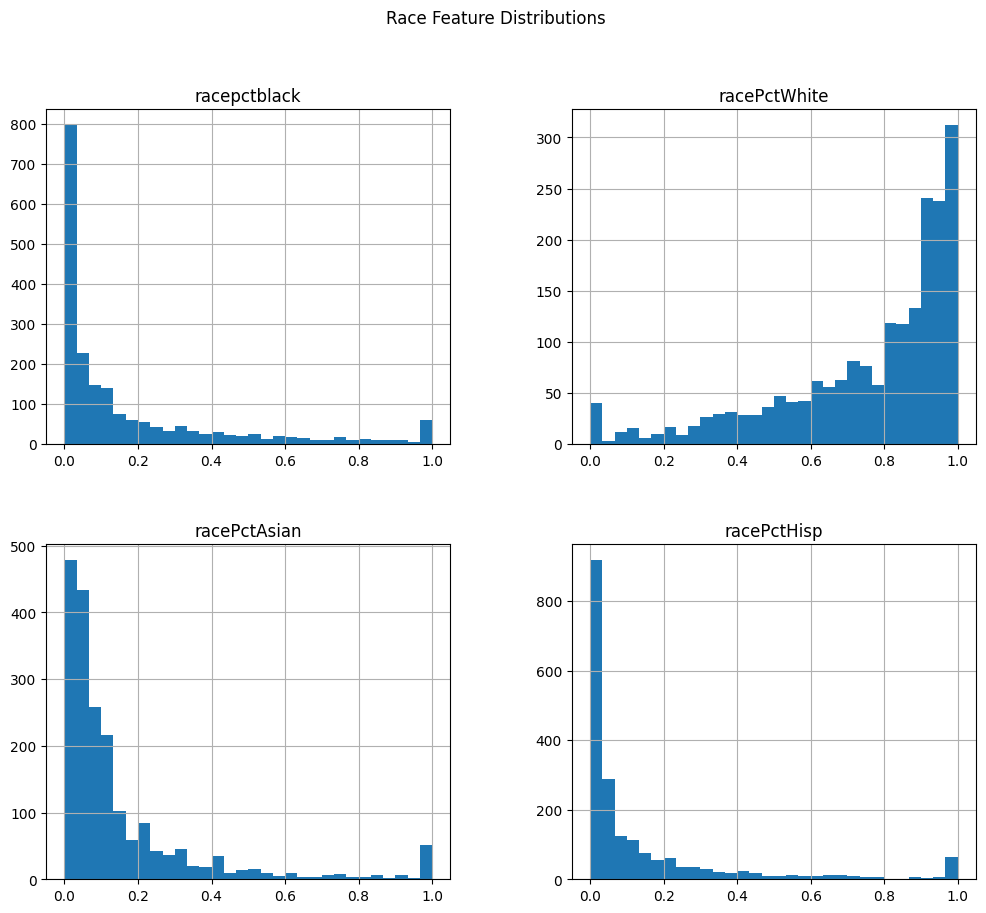

In [ ]:
#Feature distribution for race
race_cols = [c for c in df_subset_c.columns if "race" in c.lower()]

df_subset_c[race_cols].hist(bins=30, figsize=(12,10))
plt.suptitle("Race Feature Distributions")
plt.show()

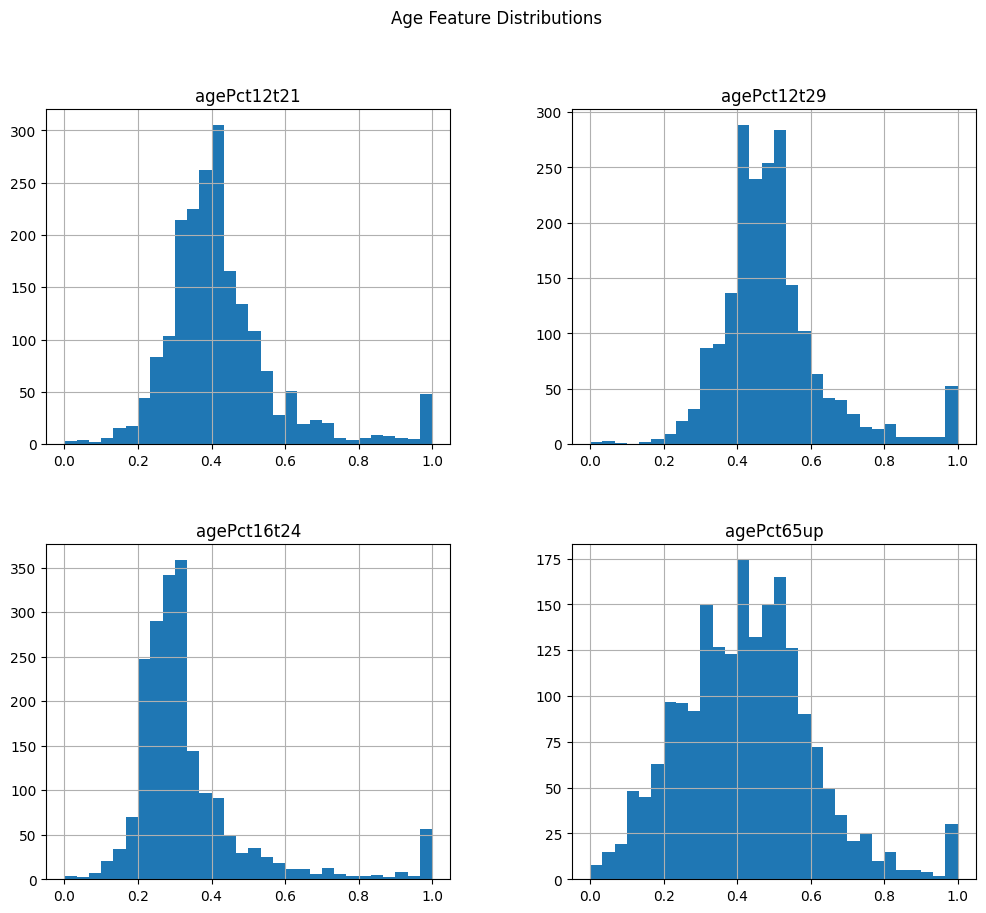

In [ ]:
#Feature Distribution for age
age_cols  = [c for c in df_subset_c.columns if "age" in c.lower()]
df_subset_c[age_cols].hist(bins=30, figsize=(12,10))
plt.suptitle("Age Feature Distributions")
plt.show()

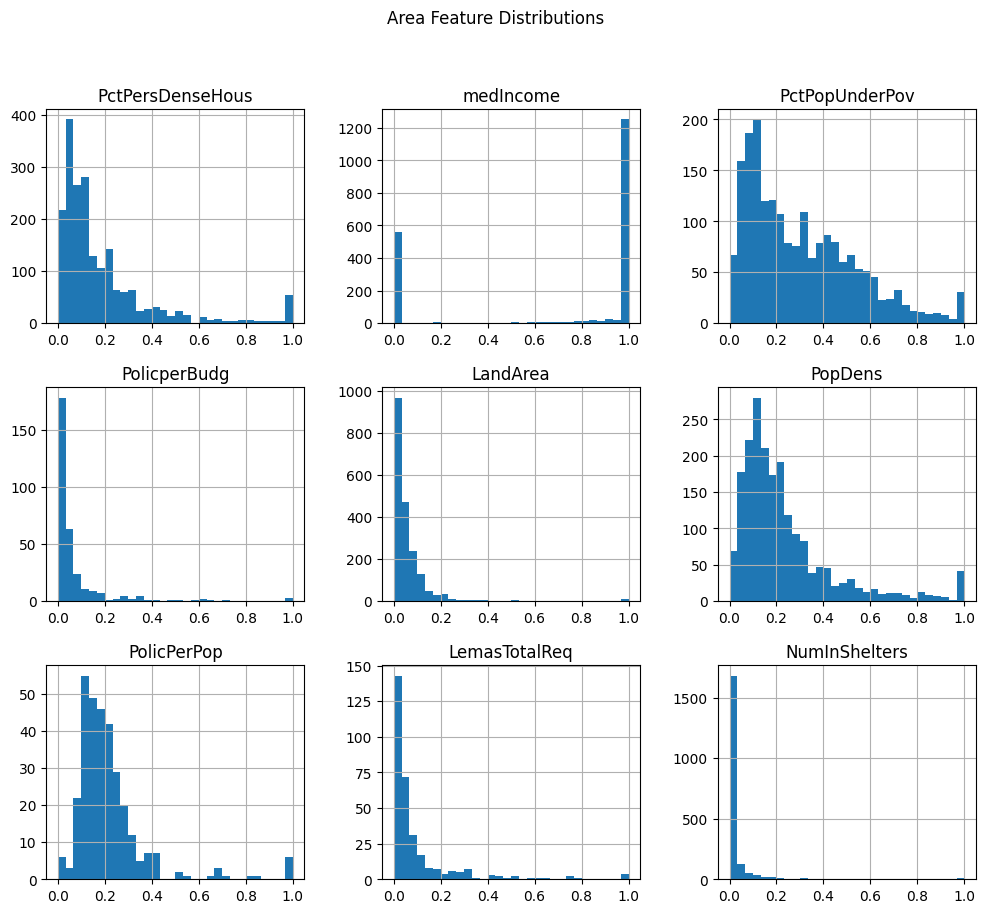

In [ ]:
#Population Feature Distribution

Land_cols = [
    'PctPersDenseHous',
    'medIncome',
    'PctPopUnderPov',
    'PolicperBudg',
    'LandArea',
    'PopDens',
    'PolicPerPop',
    'LemasTotalReq',
    'NumInShelters'
]

df_subset_c[Land_cols].hist(bins=30, figsize=(12,10))
plt.suptitle("Area Feature Distributions")
plt.show()

Variables' Relationships with Target Variable (ViolentCrimesPerPop)

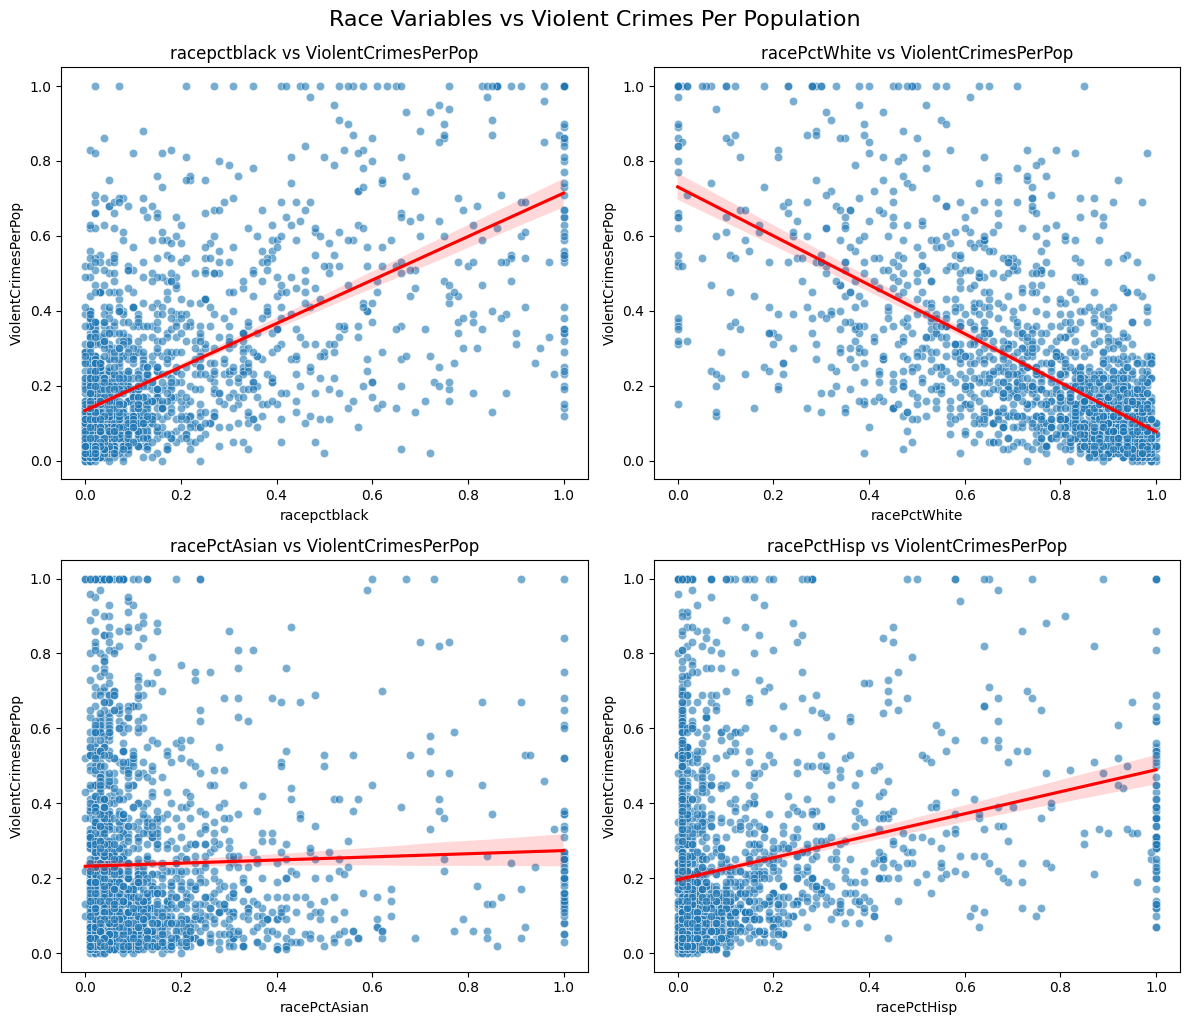

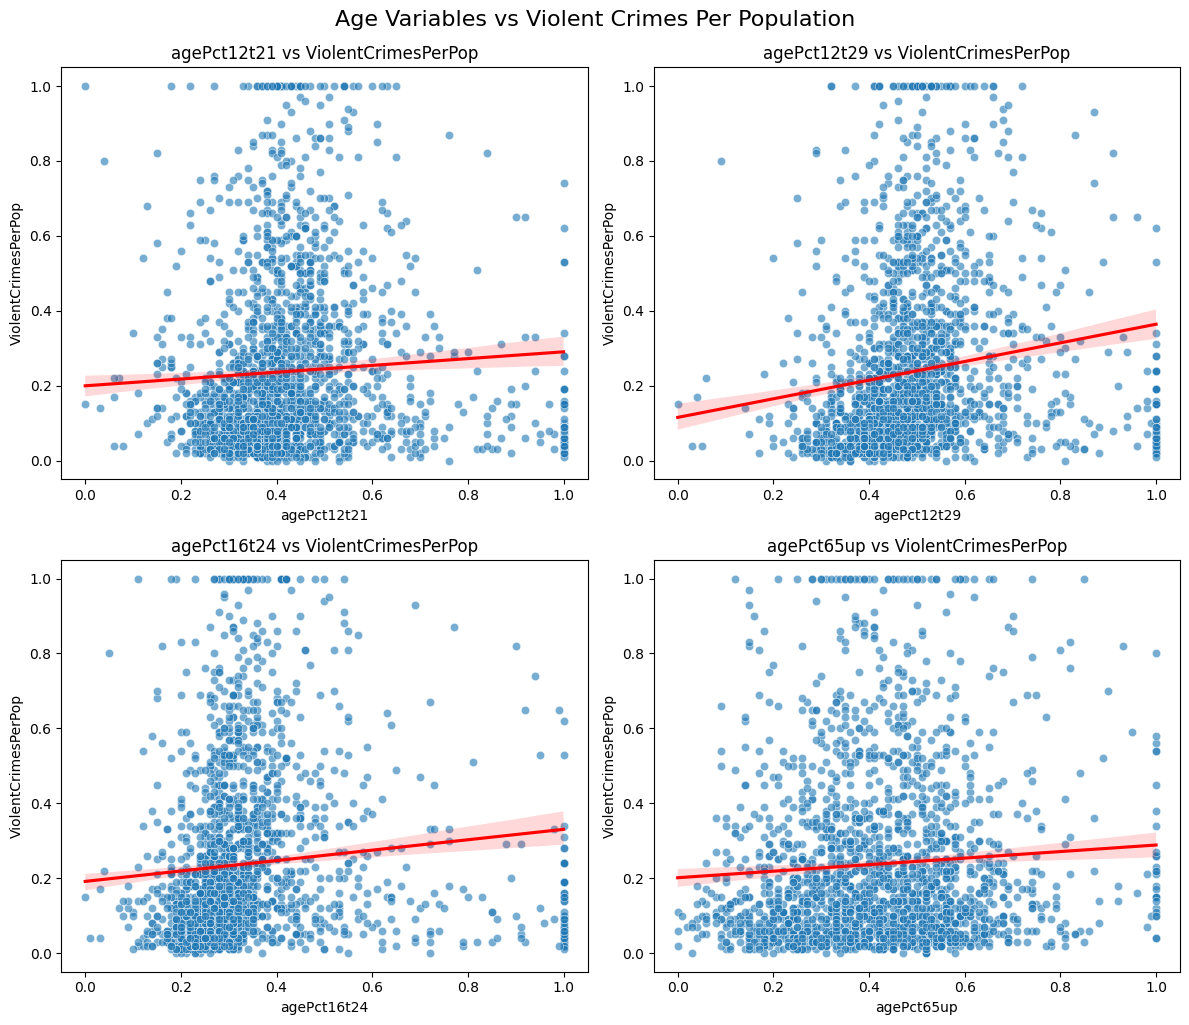

In [ ]:
#Examine demographic variables relationship with ViolentCrimesPerPop
race_vars = ["racepctblack","racePctWhite","racePctAsian","racePctHisp"]
age_vars  = ["agePct12t21","agePct12t29","agePct16t24","agePct65up"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(race_vars):
    ax = axes[i]
    sns.scatterplot(x=df_subset_c[col], y=df_subset_c["ViolentCrimesPerPop"],
                    alpha=0.6, ax=ax)
    sns.regplot(x=df_subset_c[col], y=df_subset_c["ViolentCrimesPerPop"],
                scatter=False, color='red', ax=ax)
    ax.set_title(f"{col} vs ViolentCrimesPerPop")

plt.tight_layout()
plt.suptitle("Race Variables vs Violent Crimes Per Population", y=1.02, fontsize=16)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(age_vars):
    ax = axes[i]
    sns.scatterplot(x=df_subset_c[col], y=df_subset_c["ViolentCrimesPerPop"],
                    alpha=0.6, ax=ax)
    sns.regplot(x=df_subset_c[col], y=df_subset_c["ViolentCrimesPerPop"],
                scatter=False, color='red', ax=ax)
    ax.set_title(f"{col} vs ViolentCrimesPerPop")

plt.tight_layout()
plt.suptitle("Age Variables vs Violent Crimes Per Population", y=1.02, fontsize=16)
plt.show()


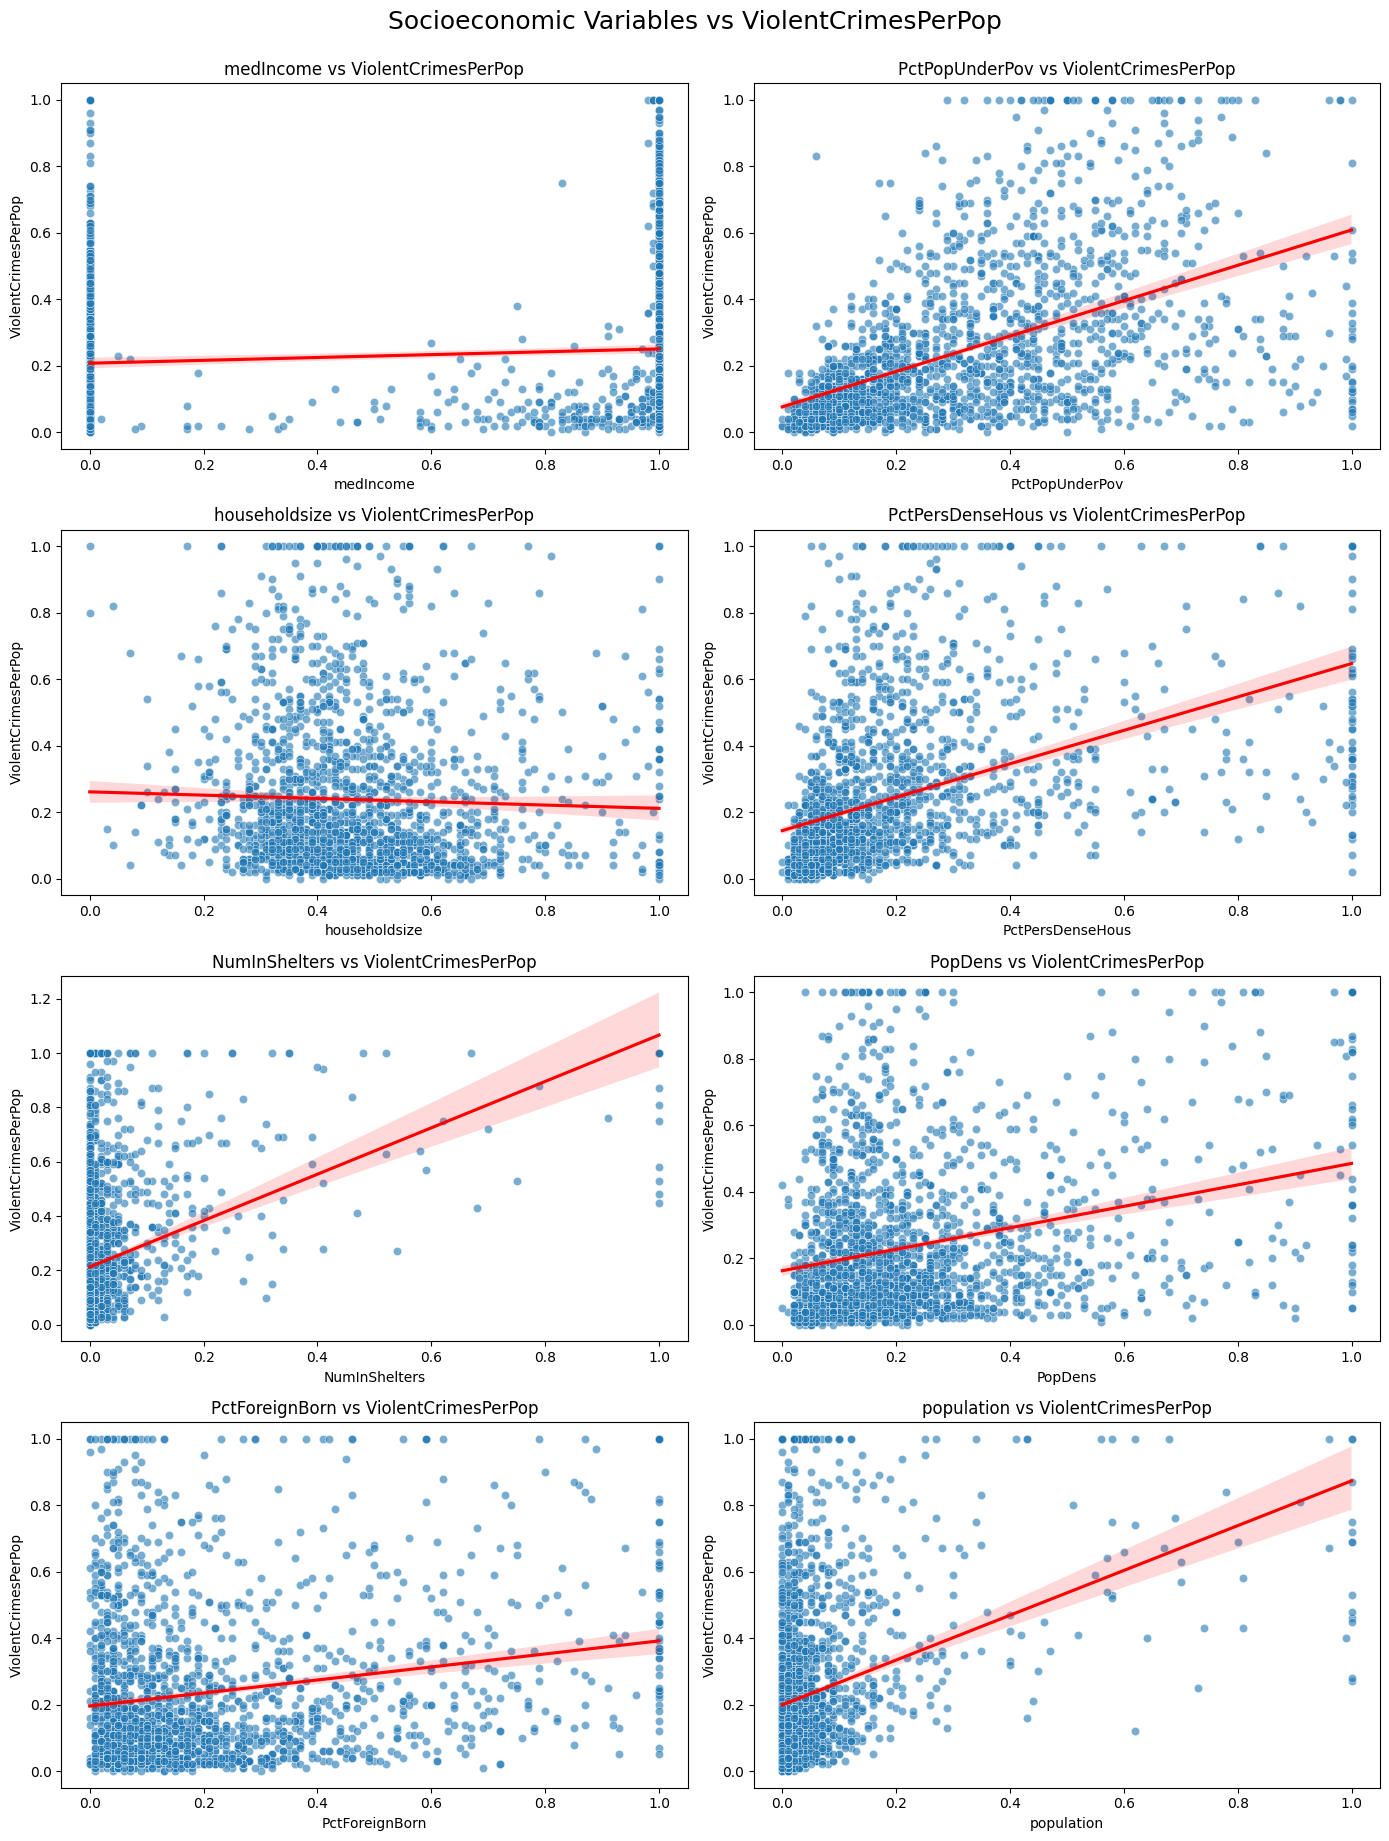

In [ ]:
#Examine socioeconomic variables relationship with ViolentCrimesPerPop
socioeconomic_vars = ["medIncome","PctPopUnderPov","householdsize","PctPersDenseHous","NumInShelters",
                      "PopDens","PctForeignBorn","population"]
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(socioeconomic_vars):
    ax = axes[i]
    sns.scatterplot(
        x=df_subset_c[col],
        y=df_subset_c["ViolentCrimesPerPop"],
        alpha=0.6,
        ax=ax
    )
    sns.regplot(
        x=df_subset_c[col],
        y=df_subset_c["ViolentCrimesPerPop"],
        scatter=False,
        color='red',
        ax=ax
    )
    ax.set_title(f"{col} vs ViolentCrimesPerPop")

plt.tight_layout()
plt.suptitle("Socioeconomic Variables vs ViolentCrimesPerPop", y=1.02, fontsize=18)
plt.show()


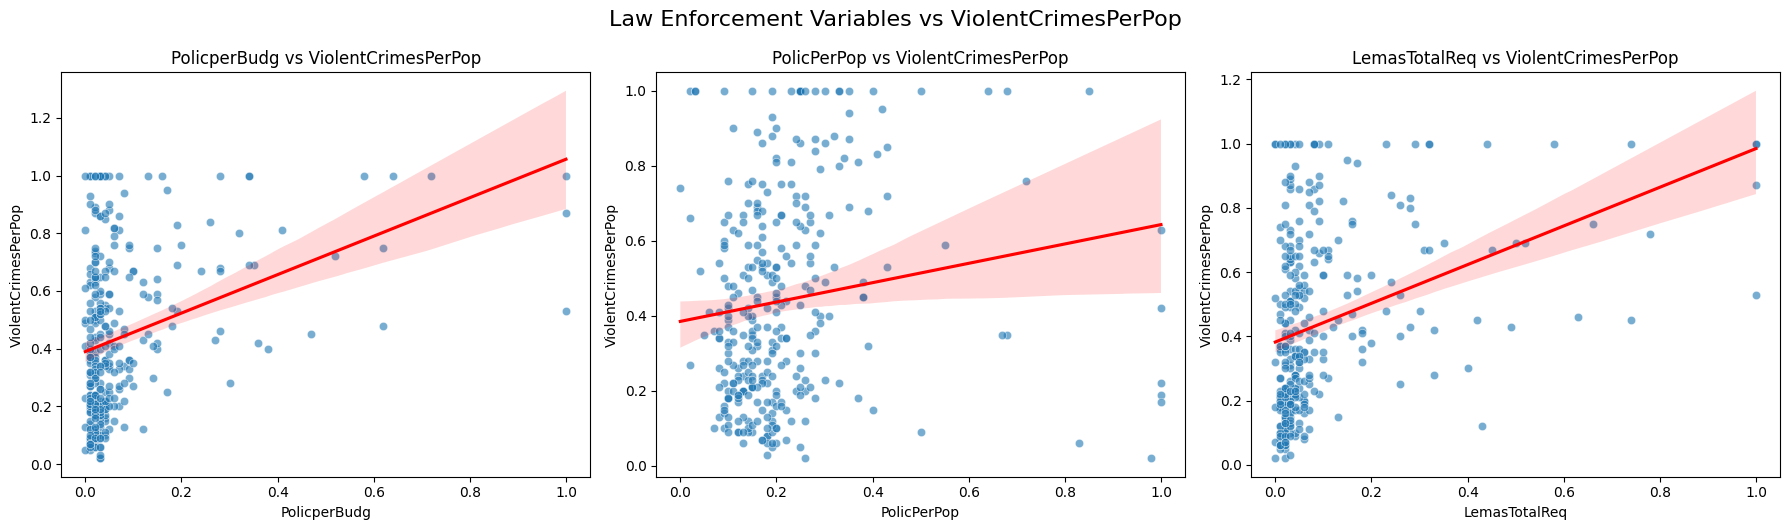

In [ ]:
#Examine law enforcement/crime variables' relationship with ViolentCrimesPerPop
law_vars = ["PolicperBudg","PolicPerPop","LemasTotalReq"]


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(law_vars):
    ax = axes[i]
    sns.scatterplot(
        x=df_subset_c[col],
        y=df_subset_c["ViolentCrimesPerPop"],
        alpha=0.6,
        ax=ax
    )
    sns.regplot(
        x=df_subset_c[col],
        y=df_subset_c["ViolentCrimesPerPop"],
        scatter=False,
        color='red',
        ax=ax
    )
    ax.set_title(f"{col} vs ViolentCrimesPerPop")

plt.tight_layout()
plt.suptitle("Law Enforcement Variables vs ViolentCrimesPerPop", y=1.05, fontsize=16)
plt.show()



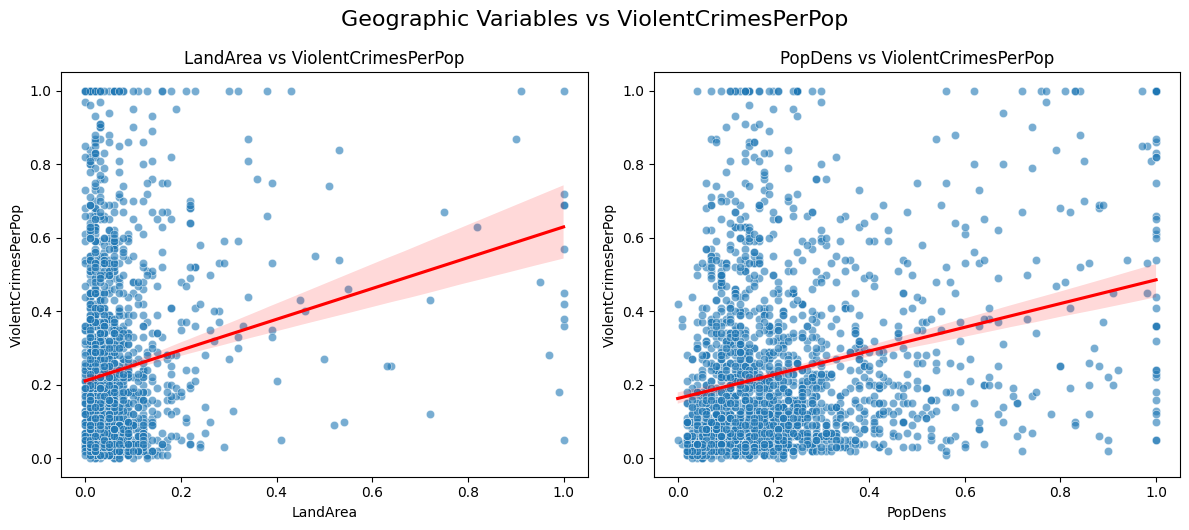

In [ ]:
#Examine geographic variables' relationship with ViolentCrimesPerPop
geo_vars = ["LandArea","PopDens"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(geo_vars):
    ax = axes[i]
    sns.scatterplot(
        x=df_subset[col],
        y=df_subset["ViolentCrimesPerPop"],
        alpha=0.6,
        ax=ax
    )
    sns.regplot(
        x=df_subset[col],
        y=df_subset["ViolentCrimesPerPop"],
        scatter=False,
        color='red',
        ax=ax
    )
    ax.set_title(f"{col} vs ViolentCrimesPerPop")

plt.tight_layout()
plt.suptitle("Geographic Variables vs ViolentCrimesPerPop", y=1.05, fontsize=16)
plt.show()

In [ ]:
#Calculate correlations of numeric variables to ViolentCrimesPerPop

numeric_df = df_subset.select_dtypes(include='number')
corrs = numeric_df.corr()["ViolentCrimesPerPop"].sort_values(ascending=False)

corr_table = corrs.reset_index()
corr_table.columns = ["Feature", "Correlation_with_ViolentCrimesPerPop"]

corr_table.style.format({"Correlation_with_ViolentCrimesPerPop": "{:.3f}"})

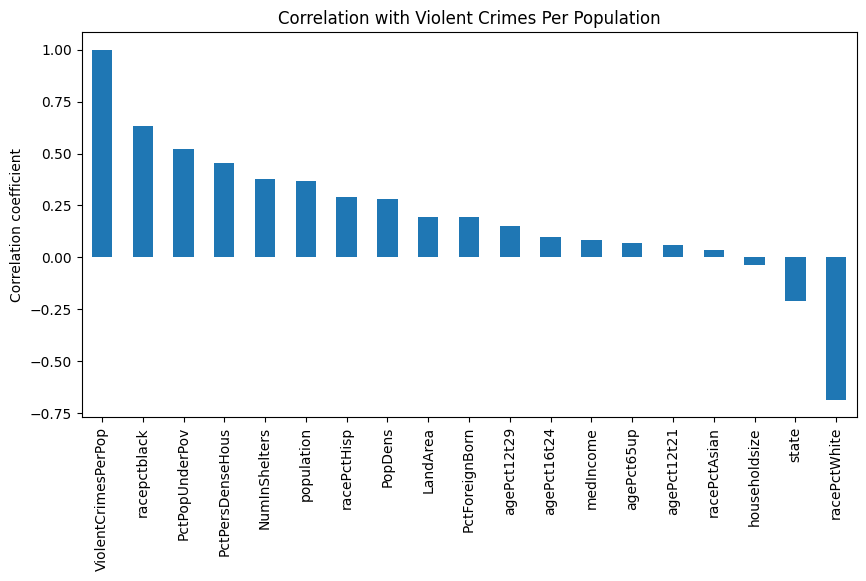

In [ ]:
#Visualize correlations
import matplotlib.pyplot as plt

corrs.plot(kind='bar', figsize=(10,5))
plt.title("Correlation with Violent Crimes Per Population")
plt.ylabel("Correlation coefficient")
plt.show()


In [ ]:
from scipy.stats.mstats import winsorize
#Winsorize numeric columns to limit outliers
df_winsor = df_subset.copy()

# Define features to winsorize
features_to_winsor = ["medIncome","PctPopUnderPov","householdsize","PctPersDenseHous",
                      "NumInShelters","PopDens","PolicperBudg","PolicPerPop","LemasTotalReq"]

# Apply Winsorization
for col in features_to_winsor:
    # Get raw float array
    x = df_winsor[col].to_numpy(dtype=float)

    # Mask non-NaN values
    mask = ~np.isnan(x)

    # Copy and winsorize only the non-NaN part
    x_w = x.copy()
    x_w[mask] = winsorize(x[mask], limits=[0.05, 0.05])

    # Put back into the dataframe
    df_winsor[col] = x_w

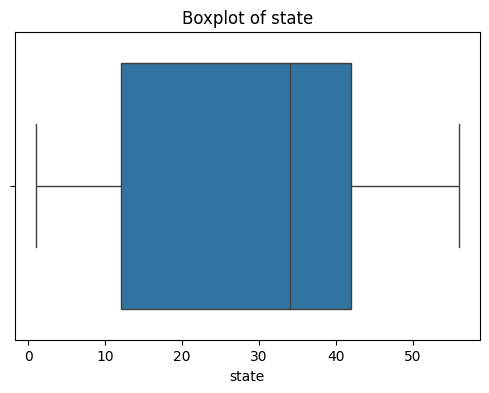

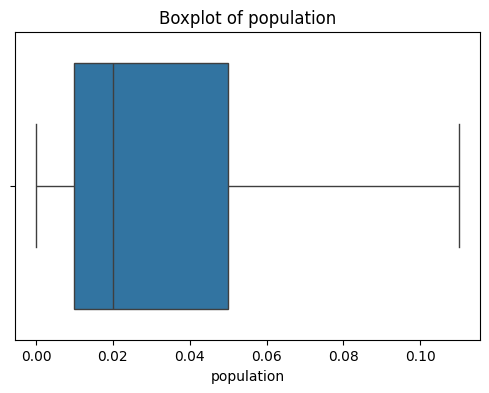

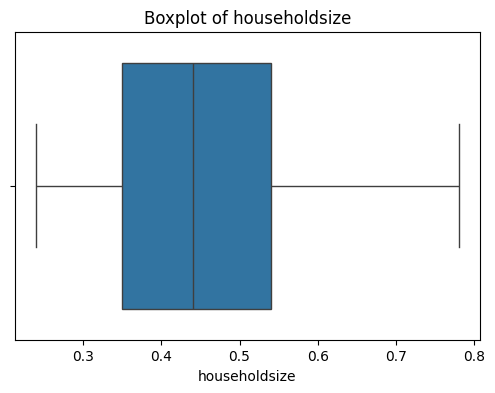

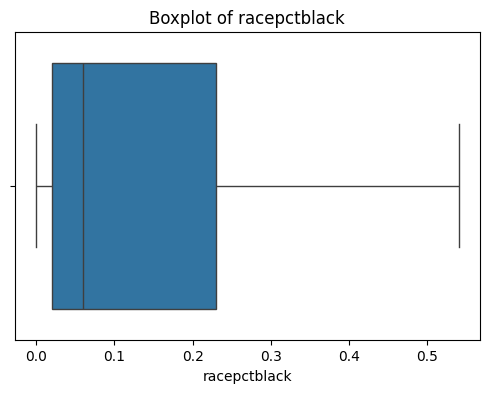

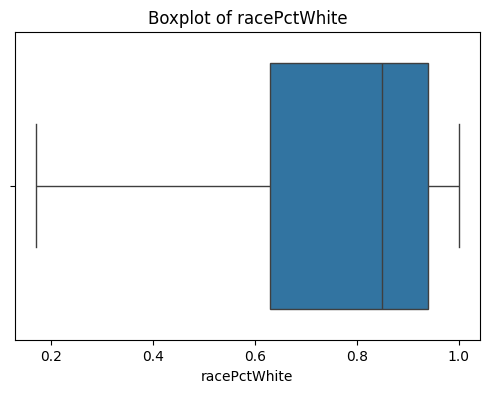

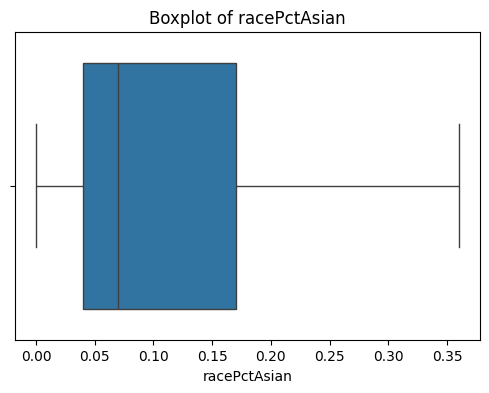

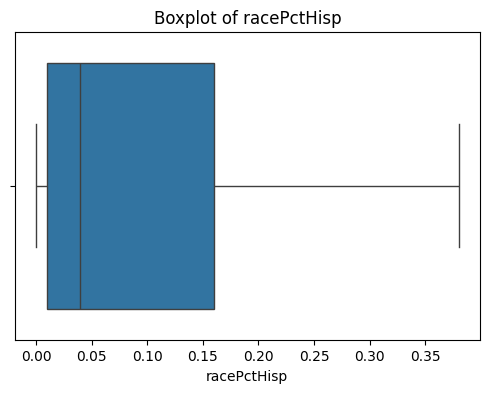

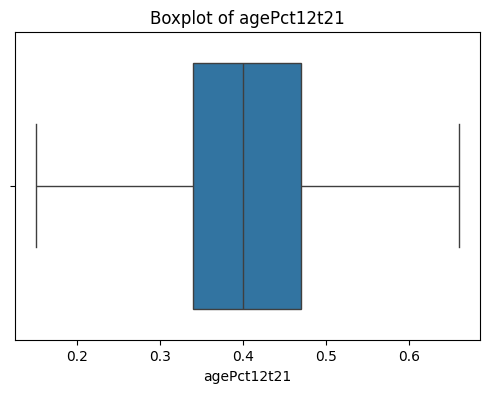

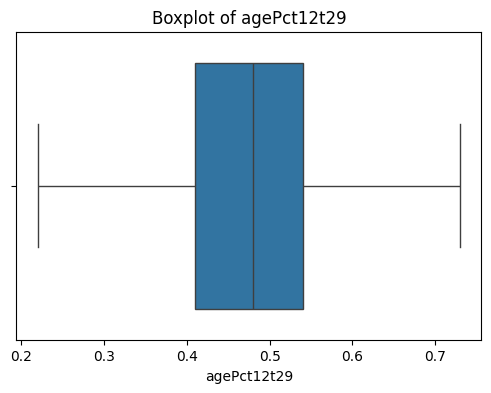

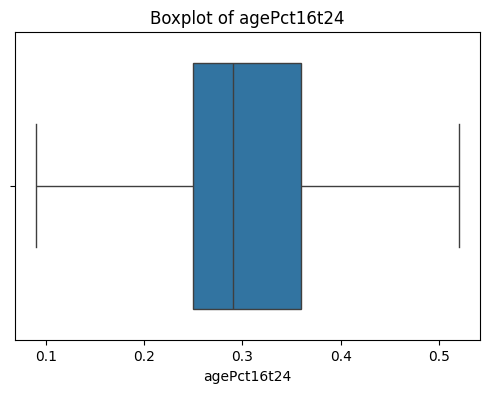

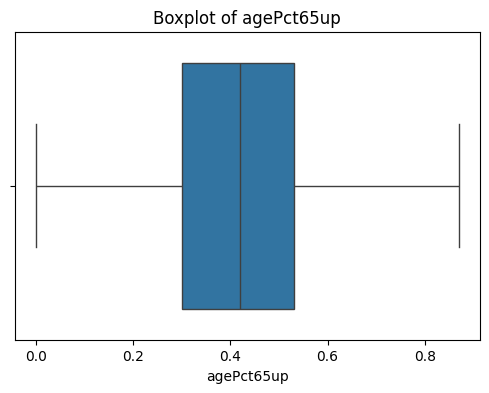

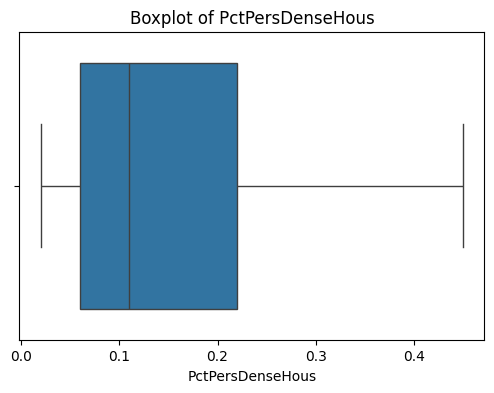

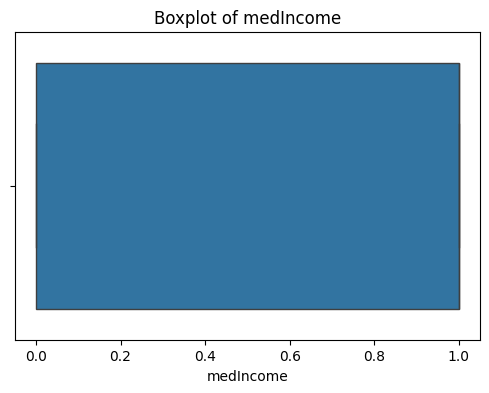

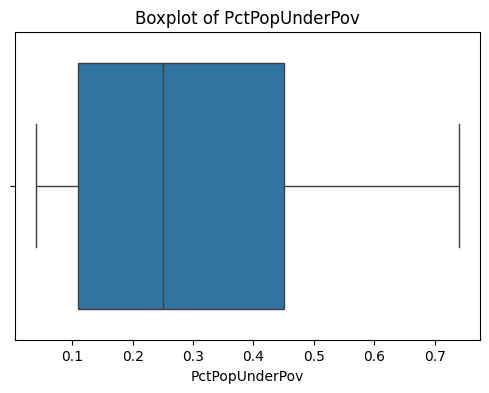

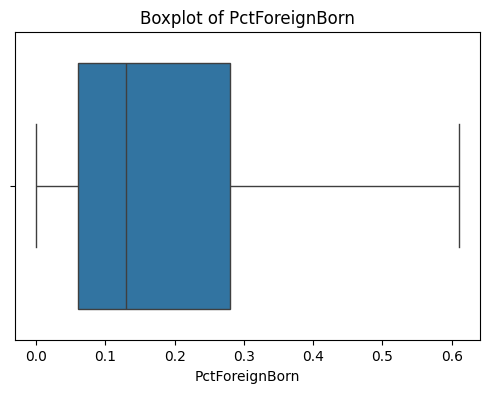

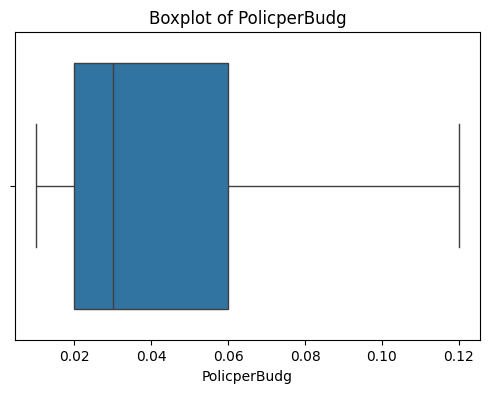

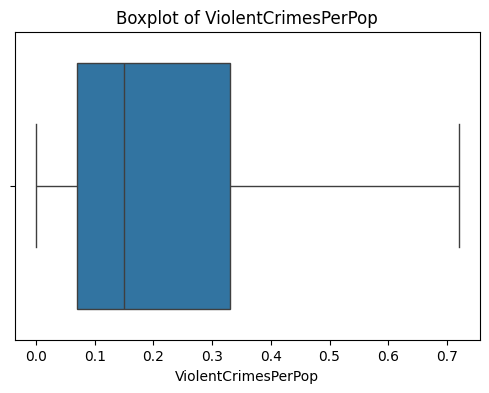

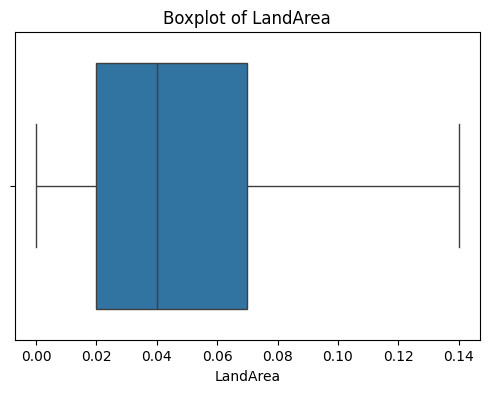

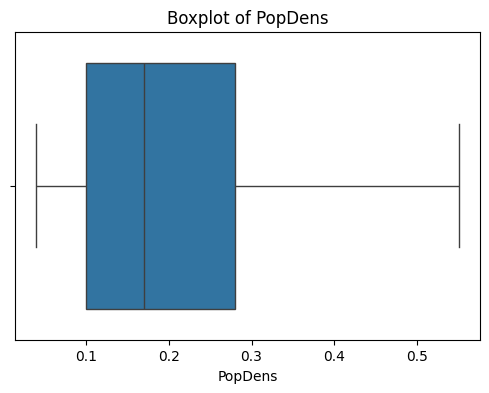

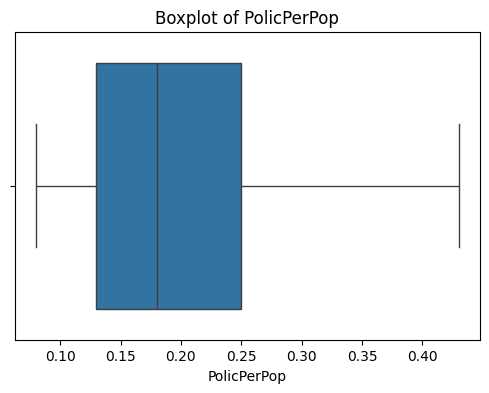

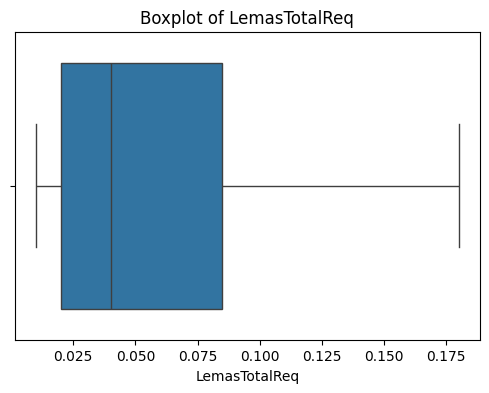

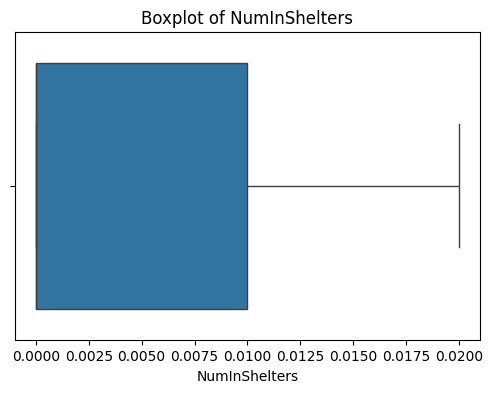

In [ ]:
#Boxplots to look for any significant outliers in numeric columns
numeric_cols = df_winsor.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_winsor[col], showfliers=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

**Create Models**

**1. Linear Regression Model**

In [ ]:
#Split into training and testing sets
X = df_subset_c.drop('ViolentCrimesPerPop', axis=1)
y = df_subset_c['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Use Lasso sklearn.linear_model.Lasso to regularize model and select the most predictive features

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LassoCV

# Numeric and categorical columns
num_features = ["community", "population","householdsize","racepctblack",
                "racePctWhite","racePctAsian","racePctHisp","agePct12t21",
                "agePct12t29","agePct16t24","agePct65up","PctPersDenseHous",
                "medIncome","PctPopUnderPov","PctForeignBorn","PolicperBudg",
                "LandArea","PopDens","PolicPerPop","LemasTotalReq","NumInShelters"
]
cat_features = ["state"]  # replace with your categorical columns

# Numeric transformer: first impute missing values, then scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # fill NaNs with mean
    ('scaler', StandardScaler())
])

# Categorical transformer: impute missing values (optional), then one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fill NaNs with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Lasso pipeline
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LassoCV(cv=5, random_state=42, max_iter=5000))
])

# Fit model
lasso_model.fit(X_train, y_train)

# Predictions
y_train_pred = lasso_model.predict(X_train)
y_test_pred  = lasso_model.predict(X_test)

# Metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_test_pred))
r2_train   = r2_score(y_train, y_train_pred)
r2_test    = r2_score(y_test,  y_test_pred)

print("LASSO Hedonic Model")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")
print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")

# Get feature names
feature_names_num = num_features
feature_names_cat = lasso_model.named_steps['preprocessor']\
    .named_transformers_['cat']\
    .get_feature_names_out(cat_features)
all_features = np.concatenate([feature_names_num, feature_names_cat])

# Coefficients
coef = lasso_model.named_steps['regressor'].coef_
selected_features = pd.Series(coef, index=all_features)
selected_features = selected_features[selected_features != 0].sort_values(key=abs, ascending=False)

# Convert to DataFrame
lasso_table = selected_features.head(10).reset_index()
lasso_table.columns = ["Feature", "LASSO_Coefficient"]
lasso_table




LASSO Hedonic Model
Train RMSE: 0.1350
Test  RMSE: 0.1277
Train R² : 0.6724
Test  R² : 0.6595


Feature  LASSO_Coefficient
0     state_MISSISSIPPI          -0.246149
1         state_FLORIDA           0.161913
2  state_SOUTH CAROLINA           0.118021
3   state_MASSACHUSETTS           0.116139
4        state_MARYLAND           0.106675
5      state_CALIFORNIA           0.100682
6          racepctblack           0.092495
7        state_VIRGINIA          -0.092302
8      state_NEW MEXICO           0.082628
9         state_GEORGIA          -0.080927

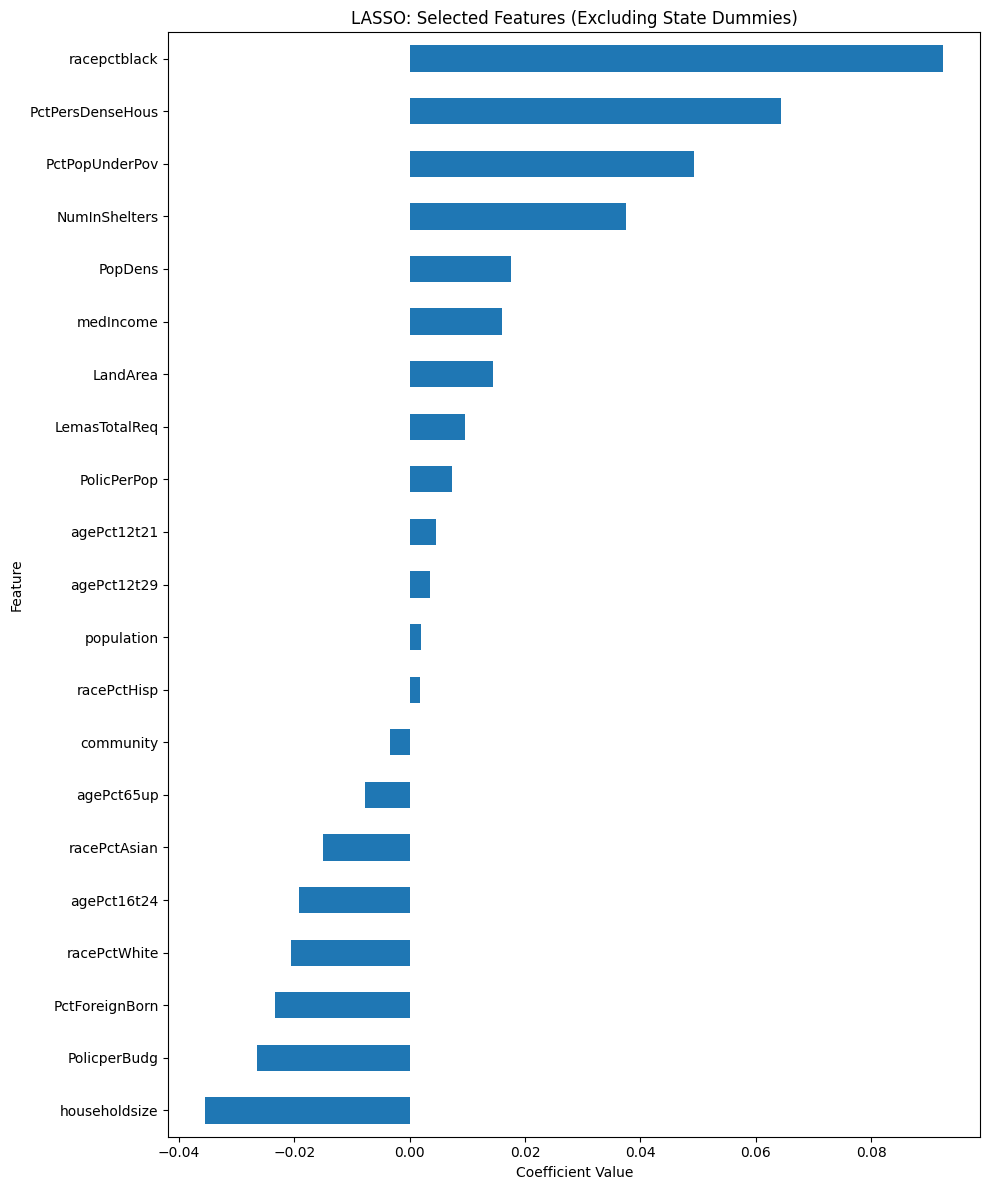

In [ ]:
#Plot Without State Dummies Included
feature_names_num = num_features
feature_names_cat = lasso_model.named_steps['preprocessor']\
    .named_transformers_['cat']\
    .get_feature_names_out(cat_features)

all_features = np.concatenate([feature_names_num, feature_names_cat])

coef = lasso_model.named_steps['regressor'].coef_
coef_series = pd.Series(coef, index=all_features)

coef_no_state = coef_series[~coef_series.index.str.startswith("state_")]

coef_no_state = coef_no_state[coef_no_state != 0].sort_values()

plt.figure(figsize=(10, 12))
coef_no_state.plot(kind='barh')
plt.title("LASSO: Selected Features (Excluding State Dummies)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

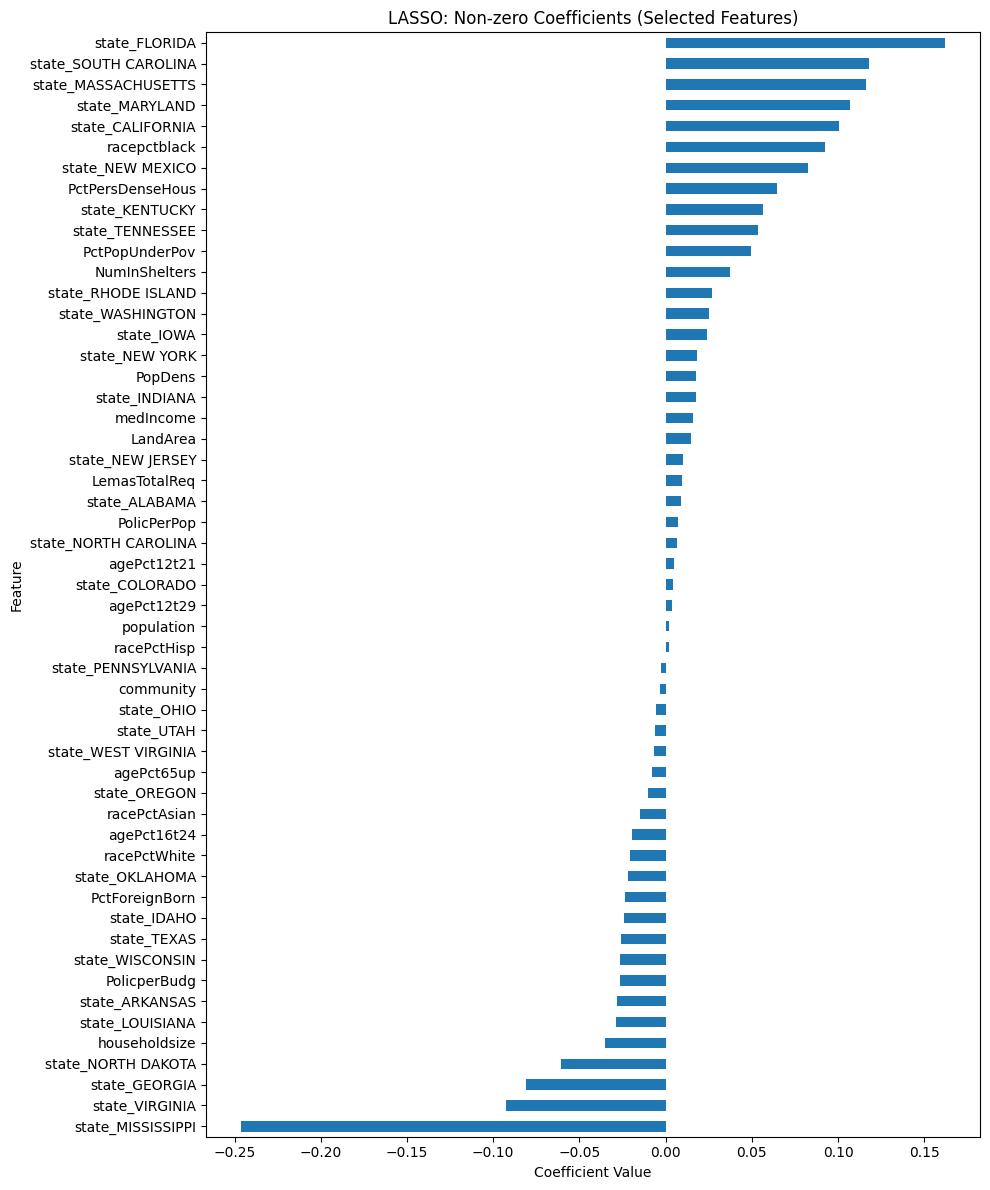

In [ ]:
#Plot With State Dummies Included
feature_names_num = num_features
feature_names_cat = lasso_model.named_steps['preprocessor']\
    .named_transformers_['cat']\
    .get_feature_names_out(cat_features)
all_features = np.concatenate([feature_names_num, feature_names_cat])

coef = lasso_model.named_steps['regressor'].coef_
coef_series = pd.Series(coef, index=all_features)

coef_nonzero = coef_series[coef_series != 0].sort_values()

plt.figure(figsize=(10, 12))
coef_nonzero.plot(kind='barh')
plt.title("LASSO: Non-zero Coefficients (Selected Features)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = ["community", "population","householdsize","racepctblack",
                "racePctWhite","racePctAsian","racePctHisp","agePct12t21",
                "agePct12t29","agePct16t24","agePct65up","PctPersDenseHous",
                "medIncome","PctPopUnderPov","PctForeignBorn","PolicperBudg",
                "LandArea","PopDens","PolicPerPop","LemasTotalReq","NumInShelters"
]
cat_features = ["state"]

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

lin_pca_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=15, random_state=42)),
    ('regressor', LinearRegression())
])

# Fit
lin_pca_model.fit(X_train, y_train)

# Predict
y_train_pred = lin_pca_model.predict(X_train)
y_test_pred  = lin_pca_model.predict(X_test)

# Metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_test_pred))
r2_train   = r2_score(y_train, y_train_pred)
r2_test    = r2_score(y_test,  y_test_pred)

print("Linear Regression with PCA")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}")
print(f"Train R² : {r2_train:.4f}")
print(f"Test  R² : {r2_test:.4f}")

Linear Regression with PCA
Train RMSE: 0.1492
Test  RMSE: 0.1359
Train R² : 0.6002
Test  R² : 0.6145


**2. K-Nearest Neighbor Model**

In [ ]:
# Fill NaNs in numeric columns with the mean
X = df_subset_c.drop('ViolentCrimesPerPop', axis=1)
y = df_subset_c['ViolentCrimesPerPop']

# Only numeric columns (KNN cannot handle strings)
numeric_cols = X.select_dtypes(include='number').columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Drop any remaining non-numeric columns for KNN
X_knn = X[numeric_cols]

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.2, random_state=42)


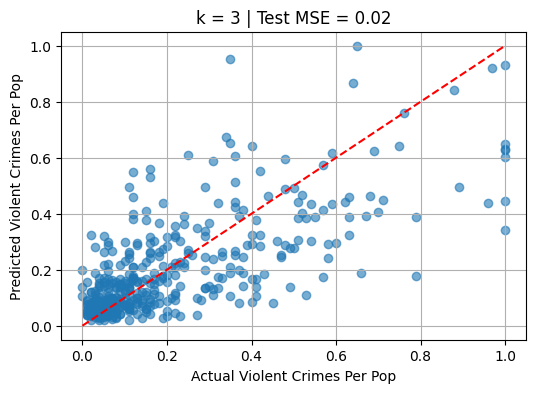

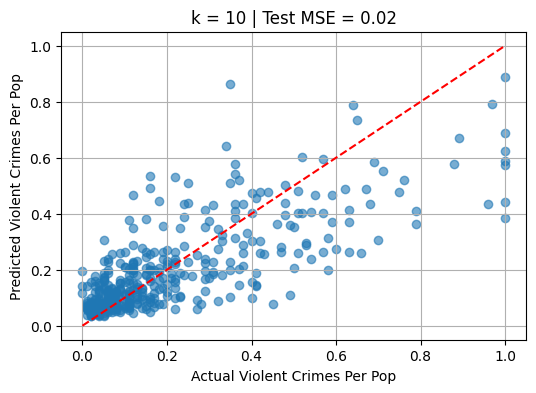

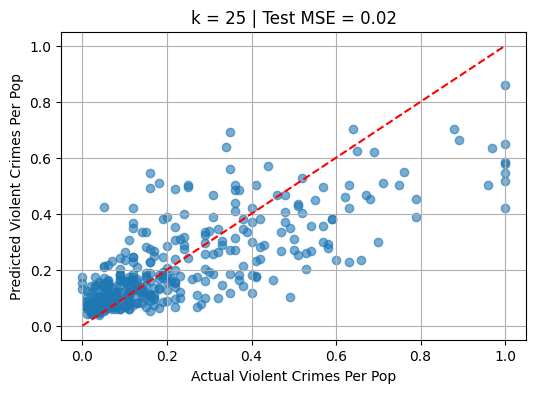

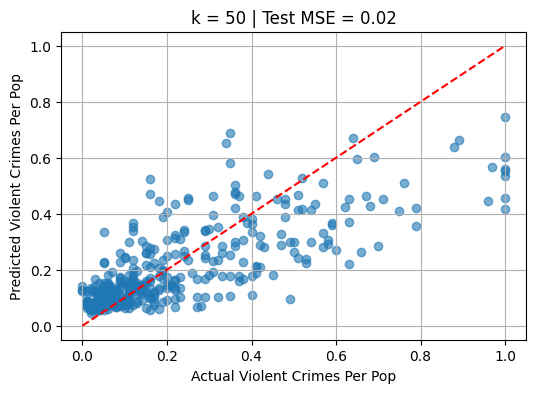

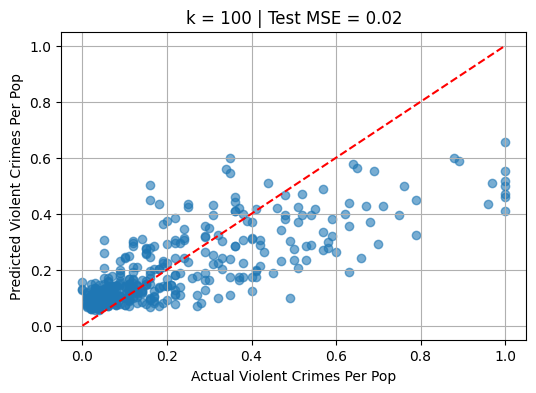

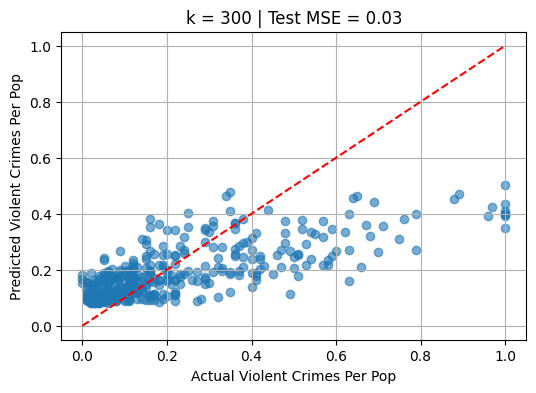

In [ ]:
ks = [3, 10, 25, 50, 100, 300]
MSE_test = []
MSE_train = []

# loop over each k value
for k in ks:
    # Create KNN model
    model = KNeighborsRegressor(n_neighbors=k)

    # Train the model on your training data
    fitted_model = model.fit(X_train, y_train)

    # Predict for test set
    y_hat_test = fitted_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_hat_test)
    MSE_test.append(mse_test)

    # Predict for training set
    y_hat_train = fitted_model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_hat_train)
    MSE_train.append(mse_train)

    # Scatterplot: actual vs predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_hat_test, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
    plt.xlabel("Actual Violent Crimes Per Pop")
    plt.ylabel("Predicted Violent Crimes Per Pop")
    plt.title(f"k = {k} | Test MSE = {mse_test:.2f}")
    plt.grid(True)
    plt.show()



In [ ]:
#Print the variance
print("Variance of y_test:", y_test.var())

Variance of y_test: 0.048016087958590026


**3. K-Means Clustering Model**

In [ ]:
# Select numeric columns for clustering
numeric_cols = ["population","householdsize","racepctblack",
                "racePctWhite","racePctAsian","racePctHisp","agePct12t21",
                "agePct12t29","agePct16t24","agePct65up","PctPersDenseHous",
                "medIncome","PctPopUnderPov","PctForeignBorn","PolicperBudg",
                "LandArea","PopDens","PolicPerPop","LemasTotalReq","NumInShelters"
]

X = df_subset_c[numeric_cols].copy()


In [ ]:
#Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Min-max normalization
X_norm = (X_imputed - X_imputed.min(axis=0)) / (X_imputed.max(axis=0) - X_imputed.min(axis=0))


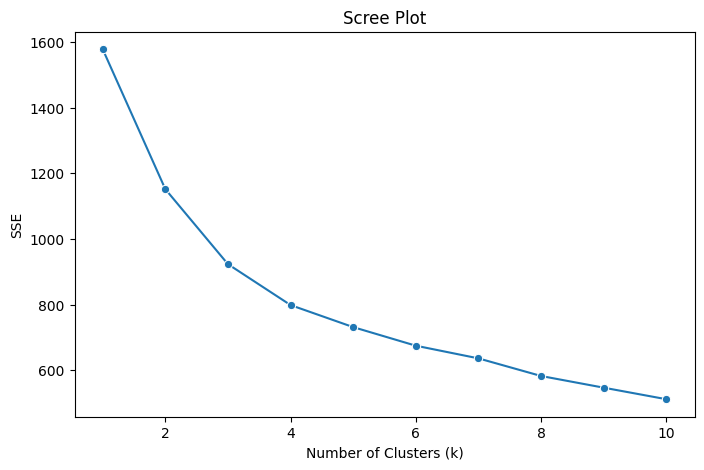

In [ ]:
# Scree plot to determine optimal k
k_bar = 10
SSE = []
for k in range(1, k_bar+1):
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=42)
    model.fit(X_norm)
    SSE.append(model.inertia_)

plt.figure(figsize=(8,5))
sns.lineplot(x=np.arange(1, k_bar+1), y=SSE, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

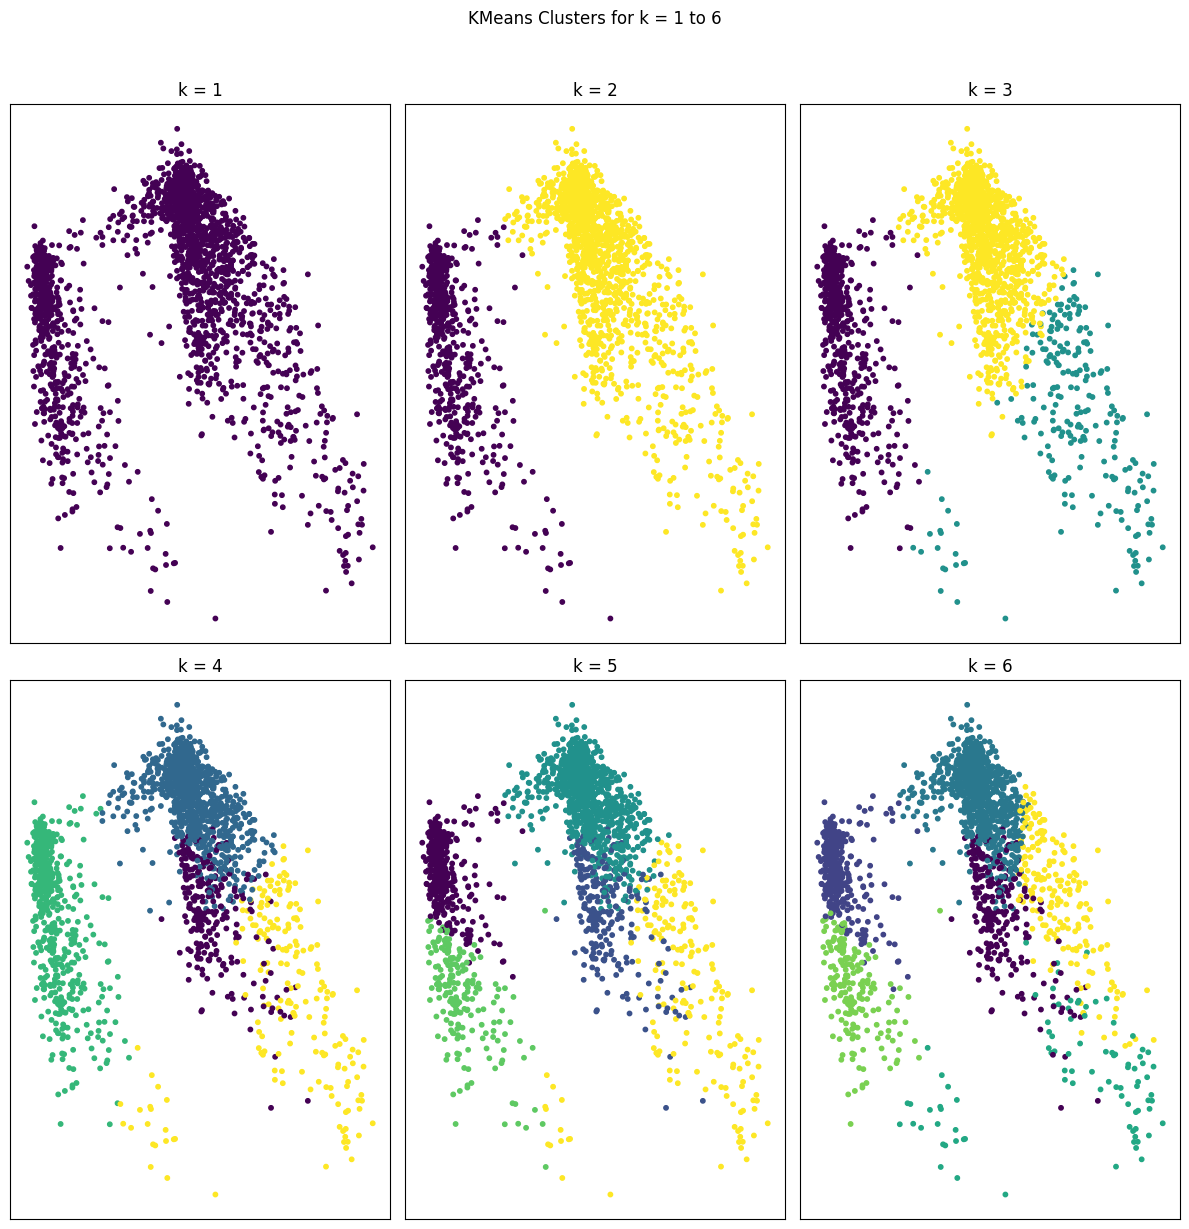

In [ ]:
pca_vis = PCA(n_components=2, random_state=42)
X_2d = pca_vis.fit_transform(X_norm)

k_values = range(1, 7)   # k = 1 to 6
num_plots = len(k_values)

fig, axes = plt.subplots(2, 3, figsize=(12, 12))   # 3 rows, 2 columns
axes = axes.ravel()

for idx, k in enumerate(k_values):
    km = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=42)
    labels = km.fit_predict(X_norm)

    ax = axes[idx]
    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=10, cmap='viridis')
    ax.set_title(f"k = {k}")
    ax.set_xticks([])
    ax.set_yticks([])

# Hide leftover empty subplots (none in this case, but good practice)
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("KMeans Clusters for k = 1 to 6", y=1.02)
plt.tight_layout()
plt.show()


Optimal k=3

In [ ]:
import pandas as pd

# Fit KMeans with optimal k=3
k_optimal = 3
kmeans_model = KMeans(n_clusters=k_optimal, max_iter=300, n_init=10, random_state=42)
labels = kmeans_model.fit_predict(X_norm)

# Add cluster labels to a DataFrame of original numeric features
df_clusters = pd.DataFrame(X_norm, columns=numeric_cols)
df_clusters['Cluster'] = labels

# Compute mean values per cluster
cluster_summary = df_clusters.groupby('Cluster').mean().round(2)
print(cluster_summary)


         population  householdsize  racepctblack  racePctWhite  racePctAsian  \
Cluster                                                                        
0              0.01           0.45          0.19          0.78          0.07   
1              0.15           0.62          0.23          0.42          0.45   
2              0.06           0.44          0.16          0.81          0.14   

         racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
Cluster                                                                   
0               0.11         0.48         0.51         0.37        0.46   
1               0.58         0.47         0.57         0.38        0.32   
2               0.08         0.39         0.47         0.31        0.43   

         PctPersDenseHous  medIncome  PctPopUnderPov  PctForeignBorn  \
Cluster                                                                
0                    0.16       0.01            0.42            0.09   
1      

In [ ]:
# Calculate mean violent crimes per cluster

# Drop columns with NaNs
X_clean = X.drop(columns=['PolicperBudg', 'PolicPerPop', 'LemasTotalReq'])

# Fit K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_clean)
clusters = kmeans.labels_

# Assign cluster labels to the original dataframe safely
df_subset.loc[:, 'Cluster'] = clusters  # avoids SettingWithCopyWarning

# Calculate mean ViolentCrimesPerPop for each cluster
cluster_summary = df_subset.groupby('Cluster')['ViolentCrimesPerPop'].mean().sort_values(ascending=False)
print("Mean ViolentCrimesPerPop per cluster:")
print(cluster_summary)






Mean ViolentCrimesPerPop per cluster:
Cluster
1    0.468053
0    0.213537
2    0.179344
Name: ViolentCrimesPerPop, dtype: float64


Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Select numeric columns
X = df_subset[numeric_cols].copy()

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # returns a NumPy array


# Hierarchical clustering

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X_norm)

# Get predicted labels
df_subset['g_hat'] = model.labels_

# scatterplot
this_plot = sns.scatterplot(x='population', y='medIncome', data=df_subset, hue='g_hat',
                    style='g_hat', palette='Set2'
)

# Move legend
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))
plt.title(f'Hierarchical Clustering (k={3})')
plt.show()



In [ ]:
#Plot dendrogram to represent the clustering scheme
plt.figure(figsize=(12, 6))
Z = linkage(X_norm, 'ward')  # Determine cluster membership
dendrogram(Z,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)  # Create dendrogram

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index of Data Points')
plt.ylabel('Distance')
plt.show()

**4. Decision Tree Model**

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Assume df_subset is your cleaned dataframe (missing values handled, numeric columns converted)

#Select target variable
# One-hot encode categorical columns
categorical_cols = ["state", "communityname"]
df_model = pd.get_dummies(df_subset, columns=categorical_cols, drop_first=True)

X = df_model.drop(columns=["ViolentCrimesPerPop"])
y = df_model["ViolentCrimesPerPop"]


#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Fit decision tree
tree = DecisionTreeRegressor(
    max_depth=6,
    random_state=42
)

tree.fit(X_train, y_train)

#Make predictions on the Test Set
y_pred = tree.predict(X_test)


#Visualize results:
plt.figure(figsize=(30,30))
var_names = tree.feature_names_in_
plot_tree(tree, filled=True, feature_names=var_names)
plt.show()


#Residuals, Rsq, RMSE
residuals = y_test - y_pred

# RMSE calculation compatible with all sklearn versions
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

# Residual plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



In [ ]:
#Feature importance analysis
importances = tree.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(feature_importance_df.head(10))  # Top 10 predictors
